3장 신경망 시작하기

일단 2장에서 배운 지식들을 정리하고, 신경망이 가장 많이 사용되는 세 종류의 문제인 이진 분류, 다중 분류, 스칼라 값을 예측하는 회귀에
배운 것들을 적용해 보자!

3 가지 예제로 신경망을 어떻게 사용하는지 살펴 볼 것이다!
- 영화 리뷰를 긍정 또는 부정으로 분류하기 (이진 분류)
- 신문 기사를 토픽으로 분류하기 (다중 분류) 
- 부동산 데이터를 바탕으로 주택 가격을 예측하기 (회귀) 

신경망의 구조 

- 네트워크(또는 모델)을 구성하는 층
- 입력 데이터와 그에 상응하는 타깃
- 학습에 사용할 피드백 신호를 정의하는 손실 함수 
- 학습 진행 방식을 결정하는 옵티마이저 

2D 텐서 (samples, features) 크기의 2D 텐서가 저장된 간단한 벡터 데이터는 완전 연결 층이나 밀집 층이라고 불리는 밀집 연결 층에 의해 처리되는 경우가 많음

3D 텐서 (samples, timesteps, features) 크기의 3D 텐서로 저장된 시퀸스 데이터는 LSTM 같은 순환 층에 의해 처리됩니다.

4D 텐서 저장되어 있는 이미지 데이터는 2D 합성곱 층에 의해 처리됩니다.(Conv2D 클래스) 

앞으로 공부하다 보면 다양한 네트워크 구조를 보게 될 것 이다!
자주 등장하는 것들 나열해 보자

- 가지(branch)가 2 개인 네트워크.
- 출력이 여러 개인 네트워크.
- 인셉션 블록 

손실 함수(loss function)(목적 함수(objective function)) : 훈련하는 동안 최소화될 값! 주어진 문제에 대한 성공 지표가 됩니다.

옵티마이저(optimzer) : 손실 함수를 기반으로 네트워크가 어떻게 업데이트될지 결정합니다. 

영화 리뷰 분류 : 이진 분류 예제 

In [2]:
from keras.datasets import imdb 

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

num_words=10000 개는 자주 사용하는 단어 1 만 개만 사용하겠다는 의미입니다. 
드물게 나타나는 단어는 무시하자! 
이렇게 하면 적절한 크기의 벡터 데이터를 얻을 수 있습니다.

변수 train_data 와 test_data 는 리뷰의 목록입니다.

각 리뷰는 단어 인덱스의 리스트입니다.   
- train_labels 와 test_labels 는 부정을 나타내는 0 과 긍정을 나타내는 1의 리스트입니다. 

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0] 

1

데이터 준비
- 신경망에 숫자 리스트를 주입할 수 없습니다, 리스트를 텐서로 바꾸는 2 가지 방법이 있습니다. 

같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환합니다.
그다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번쨰층으로 사용합니다.(Embedding 층을 말하며,나중에 자세히 다룸) 

리스트를 원-핫 인코딩(one-hot encoding)하여 0 과 1의 벡터로 변환합니다, 예를 들어 시퀸스 [3, 5]를 인덱스 3과 5의 위치는 1이고 그 외의 모두 0 인 10,000 차원의 벡터로 각각 변환 합니다.
그 다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense 층을 신경망의 첫 번쨰 층으로 사용합니다.

우리는 원-핫 인코딩 방식을 사용할 것이다. 

In [39]:
max([max(sequence) for sequence in train_data])

9999

샘플은 이제 다음과 같이 나타납니다. 

In [40]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [41]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [42]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [43]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [61]:
# 신경망 정의 
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [62]:
# 모델 컴파일. 
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 옵티마이저 설정하기.
from keras import optimizers 

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [63]:
# 검증 세트 준비하기. 훈련 검증. 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = x_train[:10000]
partial_y_train = y_train[10000:]

In [64]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

ValueError: Error when checking target: expected dense_12 to have shape (1,) but got array with shape (10000,)

In [65]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

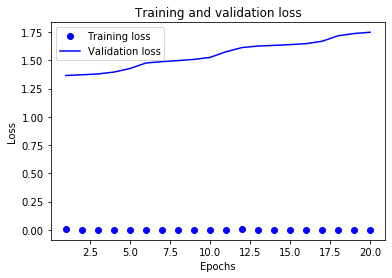

In [66]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

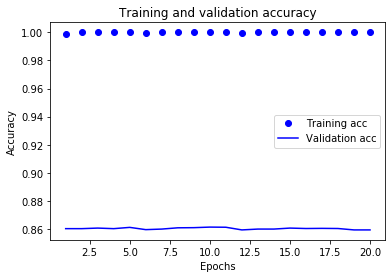

In [67]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

정리 

- 원본 데이터를 신경망에 텐서로 주입하기 위해선 꽤 많은 전처리가 필요. 단어 시퀸스는 이진 벡터로 인코딩될 수 있고 다른 인코딩 방식도 있음.
- relu 활성화 함수에 함께 Dense 층을 쌓은 네트워크 (감성 분류 포함) 여러 종류의 문제에 적용할 수 있음 .
- (출력 클래스가 2개인) 이진 분류 문제에선 네트워크는 하나의 유닛과 sigmoid 활성화 함수를 가진 Dense 층으로 끝나야 합니다.
- 이 신경망의 출력은 확률을 나타내는 0과 1 사이의 스칼라 값입니다.

- 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실 함수는 binary_crossentropy 입니다.
- rmsprop 옵티마이저는 문제에 상관 x 일반적으로 좋은 선택.
- 과대적합 되면 - 모니터링해서 데이터 성능을 조정하기 

뉴스 기사 분류 : 다중 분류 문제 

이 절에서는 로이터 뉴스를 46개의 분류하는 신경망을 만들어 보자.
클래스가 많기 떄문에 이 문제는 다중 분류의 예입니다.

각 데이터 포인트가 정확히 하나의 범주로 분류되기 떄문에 좀 더 정확히 말하면 단일 레이블 다중 분류 문제입니다.
각 데이터 포인트가 여러 개의 범주(예를 들어 토픽)에 속할 수 있다면 이것은 다중 레이블 다중 분류 문제가 됩니다. 

In [68]:
from keras.datasets import reuters 

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000) 

IMDB 데이터셋처럼 num_words=10000 매개변수는 데이터에서 가장 자주 등장하는 단어 1 만 개로 제한합니다.
여기에는 8,982 개의 훈련 샘플과 2,246 개의 테스트 샘플이 있습니다.

In [69]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [70]:
# 궁금한 경우를 위해 어떻게 단어로 디코딩하는지 알아보자!
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
                            train_data[0]]) # 0,1,2 는 '패딩','문서 시작','사전에 없음'을 위한 인덱스이므로 3을 뻅니다. 

557056/550378 [==============================] - 1s 2us/step


In [71]:
train_labels[10]

3

In [76]:
# 데이터 준비.
# 데이터 인코딩하기.
import numpy as np 

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
        return results
    
one_hot_train_labels = to_one_hot(train_labels) # 훈련 레이블 벡터 변환.
one_hot_test_labels = to_one_hot(test_labels) # 테스트 레이블 벡터 변환 

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 2/20
7982/7982 [==============================] - 1s 106us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 3/20
7982/7982 [==============================] - 1s 105us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 4/20
7982/7982 [==============================] - 1s 106us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 5/20
7982/7982 [==============================] - 1s 106us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 6/20
7982/7982 [==============================] - 1s 105us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoc

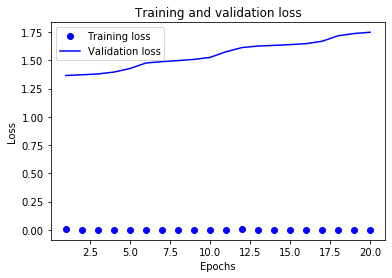

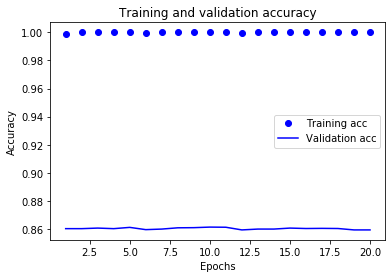

In [77]:
# 모델 구성.
from keras import models 
from keras import layers 

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) 

# 모델 컴파일하기. 
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 훈련 검증.
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# 모델 훈련하기.
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val)) 

# 훈련과 검증 손실 그리기 
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

그리고 난 후 아홉 번쨰 에포크에서 과대적합이 시작되어 아홉 번의 에포크로 새로운 모델ㅇ을 훈련하고 테스트를 평가하면 된다.
그러면 좀 더 정확도를 높게 할 수 있음.

정리 
- N개의 클래스로 데이터 포인트를 분류하려면 네트워크의 마지막 Dense 층의 크기는 N이어야 합니다.
- 단일 레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률 분포를 출력하기 위해 softmax 활성화 함수를 사용해야 합니다.
- 이런 문제에는 항상 범주형 크로스엔트로피를 사용해야 합니다. 이 함수는 모델이 출력한 확률 분포와 타깃 분포 사이의 거리를 최소화합니다.

- 다중 분류에서 레이블을 다루는 두 가지 방법.
    - 레이블을 범주형 인코딩(또는 원-핫 인코딩)으로 인코딩하고 categorical_crossentropy 손실 함수를 사용합니다.
    - 레이블을 정수로 인코딩하고 sparse_categorical_crossentropy 손실 함수를 사용합니다.
 
- 많은 수의 범주를 분류할 떄 중간층의 크기가 너무 작아 네트워크에 정보의 병목이 생기지 않도록 해야 합니다.

주택 가격 예측 : 회귀 문제 

입력 데이터 포인트의 개별적인 레이블 하나를 예측하는 것이 목적입니다.
또 다른 종류의 머신 러닝 문제는 개별적 레이블 대신 연속적 값을 예측하는 회귀 입니다.

In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

데이터 준비.

네트워크가 이런 다양한 데이터에 자동으로 맞추려고 할 수 있지만 이는 확실히 학습을 더 어렵게 만듭니다.
이런 데이터를 다룰떄 대표적 방법 특성별로 정규화를 하는 것 입니다.

입력 데이터에 있는 각 특성(입력 데이터 행렬의 열)에 대해 특성의 평균을 뺴고 표준 편차로 나눕니다.
특성의 중앙이 0 근처에 맞추어 지고 표준 편차가 1이 됩니다. 넘파이 사용하면 간단하게 할 수 있음.

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

모델 구성 
샘플 개수가 적기 떄문에 64개의 유닛을 가진 2개의 은닉 층으로 작은 네트워크를 구성하여 사용하자.
훈련 데이터는 개수가 적을수록 과대적합이 더 쉽게 일어나므로 작은 모델을 사용하는 것이 과대적합을 피하는 방법.

In [ ]:
from keras import layers 
from keras import models 

def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                          input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model 

In [ ]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # 검증 데이터 준비: k번째 분할 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

In [ ]:
from keras import backend as K

# 메모리 해제
K.clear_session()

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# 새롭게 컴파인된 모델을 얻습니다
model = build_model()
# 전체 데이터로 훈련시킵니다
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

정리 

- 회귀에서 분류에서 사용했던 것과는 다른 손실 함수를 사용합니다, 평균 제곱 오차(MSE)는 회귀에서 자주 사용되는 손실 함수.
- 비슷하게 회귀에서 사용되는 평가 지표는 분류와 다름, 당현 정확도 개념은 회귀에 적용되지 않습니다. 일반적 회귀 지표는 MSE 입니다.
- 입력 데이터의 특성이 서로 다른 범위를 가지면 전처리 단계에서 각 특성을 개별적으로 스케일 조정해야 합니다.
- 가용한 데이터 적다면 K-겹 검증을 사용하는 것이 신뢰할 수 있는 모델 평가 방법입니다.
- 가용한 훈련 데이터가 적다면 과대적합을 피하기 위해 은닉 층의 수를 줄인 모델이 좋습니다.(일반적 1개, 또는 2개) 


요약 

- 원본 데이터를 신경망에 주입하기 전에 전처리해야 합니다.
- 데이터에 범위가 다른 특성이 있다면 전처리 단계에서 각 특성을 독립적으로 스케일 조정해야 합니다. 
- 훈련이 진행됨에 따라 신경망의 과대적합이 시작되고 새로운 데이터에 대한 안좋은 결과가 얻게 됨.
- 훈련 데이터가 많지 않으면 과대적합을 피하기 위해 1개 또는 2개 은칙 층을 가진 신경망을 사용해야 합니다.
- 데이터가 많은 범주로 나뉘어 있을 떄 중간층이 너무 작으면 정보의 병목이 생길 수 있음.
- 회귀는 분류와 다른 손실 함수와 평가 지표를 사용합니다.
- 적은 데이터를 사용할 떄는 K-겹 검증이 신뢰할 수 있는 모델 평가를 도와줍니다. 